In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey.csv


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(next(iter(uploaded)), encoding='latin1')

df.head()


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [ ]:
df.columns


Index(['SN', 'Total Feedback Given', 'Total Configured', 'Questions',
       'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4',
       'Weightage 5', 'Average/ Percentage', 'Course Name ', 'Basic Course'],
      dtype='object')

In [ ]:
# Keeping only required columns
rating_df = df[['Questions', 'Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5']].copy()

# Melting the rating columns
long_df = pd.melt(rating_df, id_vars=['Questions'],
                  value_vars=['Weightage 1', 'Weightage 2', 'Weightage 3', 'Weightage 4', 'Weightage 5'],
                  var_name='Rating', value_name='Count')

# Cleaning rating column to keep only number
long_df['Rating'] = long_df['Rating'].str.extract('(\d)').astype(int)

long_df.head()


,Questions,Rating,Count
0,How much of the syllabus was covered in the cl...,1,0
1,How well did the teachers prepare for the clas...,1,0
2,How well were the teachers able to communicate?,1,0
3,The teachers approach to teaching can best be...,1,0
4,Fairness of the internal evaluation process by...,1,0


/tmp/ipython-input-7-1211229407.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Rating', y='Count', data=long_df, estimator=sum, ci=None)


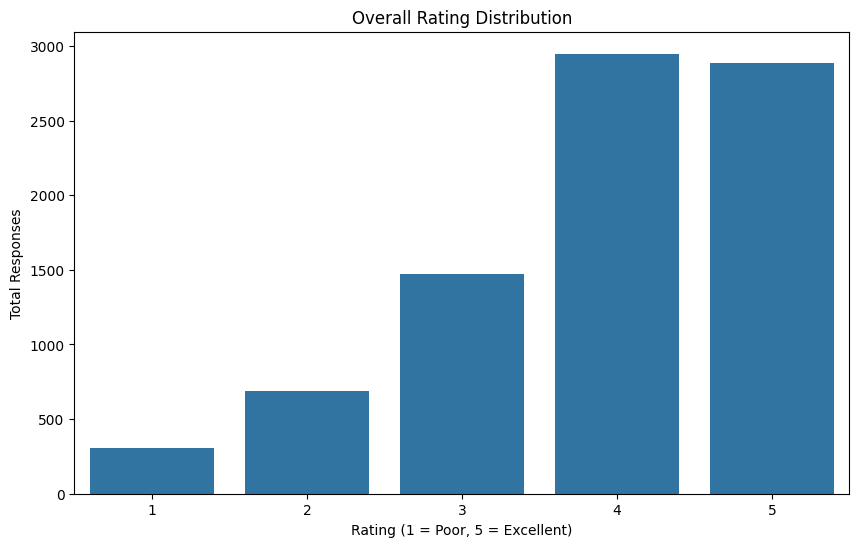

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y='Count', data=long_df, estimator=sum, ci=None)
plt.title('Overall Rating Distribution')
plt.xlabel('Rating (1 = Poor, 5 = Excellent)')
plt.ylabel('Total Responses')
plt.show()


In [ ]:
# Total rating score per question
long_df['Score'] = long_df['Rating'] * long_df['Count']

# Group by question and calculate weighted average
avg_rating = long_df.groupby('Questions').apply(
    lambda x: x['Score'].sum() / x['Count'].sum()
).reset_index(name='Average Rating')

# Top 5 best-rated
top5 = avg_rating.sort_values(by='Average Rating', ascending=False).head(5)
# Bottom 5 worst-rated
bottom5 = avg_rating.sort_values(by='Average Rating', ascending=True).head(5)

print("⭐ Top 5 Highest Rated Questions")
print(top5)

print("\n⚠️ Bottom 5 Lowest Rated Questions")
print(bottom5)


⭐ Top 5 Highest Rated Questions
                                            Questions  Average Rating
4     How well were the teachers able to communicate?        4.175904
1   Fairness of the internal evaluation process by...        4.139759
7   Teachers inform you about your expected compet...        4.021687
14  The teachers illustrate the concepts through e...        4.000000
2   How much of the syllabus was covered in the cl...        3.997590

⚠️ Bottom 5 Lowest Rated Questions
                                            Questions  Average Rating
18  What percentage of teachers use ICT tools such...        3.318072
16  The teaching and mentoring process in your ins...        3.773494
5   Teachers are able to identify your weaknesses ...        3.787952
15  The teachers approach to teaching can best be...        3.787952
8   The institute takes an active interest in prom...        3.821687


/tmp/ipython-input-8-4285232261.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_rating = long_df.groupby('Questions').apply(


/tmp/ipython-input-9-1039317883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Questions', x='Average Rating', data=avg_rating.sort_values('Average Rating', ascending=True), palette='coolwarm')
/tmp/ipython-input-9-1039317883.py:6: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-9-1039317883.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


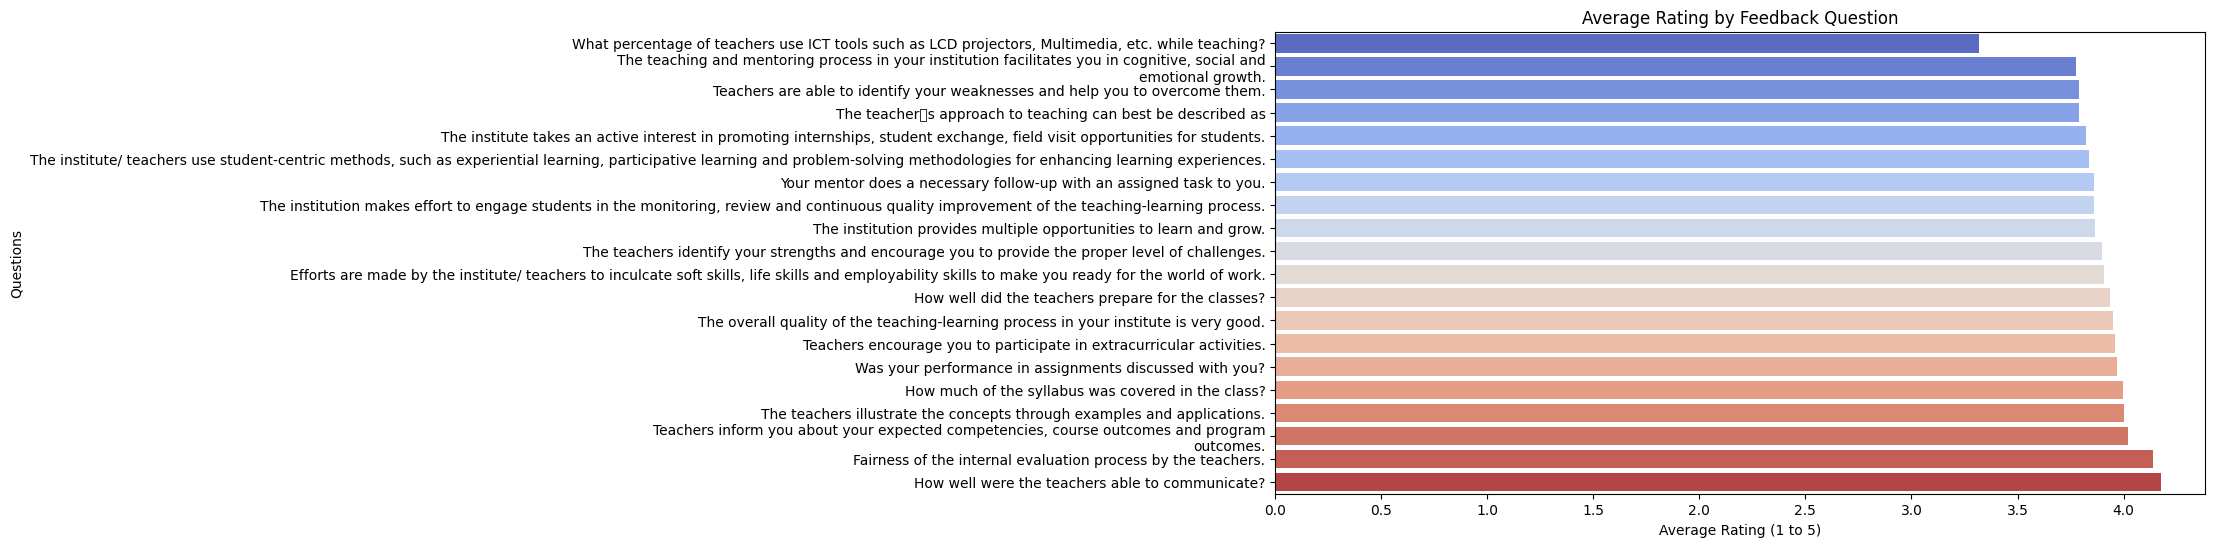

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='Questions', x='Average Rating', data=avg_rating.sort_values('Average Rating', ascending=True), palette='coolwarm')
plt.title('Average Rating by Feedback Question')
plt.xlabel('Average Rating (1 to 5)')
plt.ylabel('Questions')
plt.tight_layout()
plt.show()


## 📌 Insights & Suggestions

🔹 Majority of feedback is in the 4–5 rating range, indicating overall positive sentiment.
🔹 Top-rated questions suggest strong satisfaction in [insert topic].
🔹 Lowest-rated questions indicate possible gaps in [insert weak areas].
🔹 Recommendation:
- Focus on improving engagement in weaker areas.
- Consider follow-up surveys to explore low ratings in detail.
- Maintain strengths seen in top-rated topics consistently.

✅ This feedback analysis helps event organizers & college departments make more informed improvements for future events.
